In [128]:
%matplotlib inline

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Should This Loan be Approved or Not? Draft

As a representative of the bank, should I grant a loan to a particular small business (Company X)? Why or  why not? The student makes this decision by assessing a loan’s risk.

The assessment is accomplished by estimating the loan’s default probability through analyzing this historical dataset and then classifying the loan into one of two categories: (a) higher risk—likely to default on the loan (i.e., be charged off/failure to pay in full) or (b) lower risk—likely to pay off the loan in full.

### Read

In [130]:
loan_directory = Path(r"C:\Users\a1056968\Desktop\loan")
loan = pd.read_csv(loan_directory / "SBAnational.csv")

C:\Users\a1056968\AppData\Local\Temp\ipykernel_10248\1598949653.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv(loan_directory / "SBAnational.csv")


In [131]:
loan.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Get to know

In [132]:
loan.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [133]:
loan.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [134]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [135]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [136]:
loan.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               70
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

In [175]:
loan.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
industry                  0
dtype: int64

### Industry

In [137]:
loan.NAICS.value_counts()[loan.NAICS.value_counts() > 100]

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
423130       102
424110       102
327122       101
562219       101
541720       101
Name: NAICS, Length: 717, dtype: int64

In [138]:
loan['industry'] = loan.NAICS // 10000

In [139]:
loan.industry.value_counts()

0     201948
44     84737
81     72618
54     68170
72     67600
23     66646
62     55366
42     48743
45     42514
33     38284
56     32685
48     20310
32     17936
71     14640
53     13632
31     11809
51     11379
52      9496
11      9005
61      6425
49      2221
21      1851
22       663
55       257
92       229
Name: industry, dtype: int64

### ApprovalFY

In [140]:
loan.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [141]:
loan.ApprovalFY = loan.ApprovalFY.replace({'1976A': 1976})

In [142]:
loan.ApprovalFY.astype('int16').value_counts().sort_index()

1962        1
1965        1
1966        1
1967        2
1968        2
1969        4
1970        8
1971       20
1972       27
1973       52
1974       42
1975       30
1976       84
1977      137
1978      242
1979      352
1980      477
1981      630
1982      719
1983     1684
1984     2022
1985     1944
1986     2118
1987     2218
1988     1898
1989    13248
1990    14859
1991    15666
1992    20885
1993    23305
1994    31598
1995    45758
1996    40112
1997    37748
1998    36016
1999    37363
2000    37381
2001    37350
2002    44391
2003    58193
2004    68290
2005    77525
2006    76040
2007    71876
2008    39540
2009    19126
2010    16848
2011    12608
2012     5997
2013     2458
2014      268
Name: ApprovalFY, dtype: int64

### ApprovalDate

In [143]:
loan.ApprovalDate

0         28-Feb-97
1         28-Feb-97
2         28-Feb-97
3         28-Feb-97
4         28-Feb-97
            ...    
899159    27-Feb-97
899160    27-Feb-97
899161    27-Feb-97
899162    27-Feb-97
899163    27-Feb-97
Name: ApprovalDate, Length: 899164, dtype: object

In [144]:
pd.to_datetime(loan.ApprovalDate, dayfirst=True)

0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
899159   1997-02-27
899160   1997-02-27
899161   1997-02-27
899162   1997-02-27
899163   1997-02-27
Name: ApprovalDate, Length: 899164, dtype: datetime64[ns]

In [145]:
approval_dates = pd.to_datetime(loan.ApprovalDate, dayfirst=True)

In [146]:
invalid_approval_dates = approval_dates[approval_dates > "2022-12-31"]
invalid_approval_dates

649      2071-08-13
7454     2071-11-16
7509     2071-11-30
20250    2071-08-06
22206    2071-12-20
26514    2071-07-13
38362    2071-07-16
38437    2071-09-10
38920    2061-12-07
44932    2064-11-27
49244    2066-05-18
434334   2067-02-28
683481   2067-07-20
689069   2067-04-25
697801   2068-02-09
720402   2068-12-03
726149   2069-04-28
729572   2070-04-20
732056   2068-09-24
738410   2069-01-31
745197   2070-02-11
747668   2069-10-13
748184   2070-04-30
750426   2071-04-16
751558   2070-04-21
754386   2069-10-09
766960   2070-04-07
767019   2070-07-22
767065   2070-10-06
767683   2070-11-06
768081   2070-08-14
771437   2070-09-01
771486   2070-05-13
772010   2070-10-09
772589   2070-09-11
772962   2070-07-23
774035   2071-06-29
774474   2070-10-12
779337   2070-09-18
779520   2070-12-31
785511   2070-12-22
799032   2070-12-30
804226   2071-01-11
805754   2071-05-28
820902   2071-03-17
820949   2071-04-26
839161   2071-04-07
Name: ApprovalDate, dtype: datetime64[ns]

In [147]:
approval_dates[approval_dates > "2022-12-31"] = invalid_approval_dates - pd.DateOffset(years=100)

### NoEmp

In [148]:
print("Proportion of cases with employees less then a limit:")
for employee_count in [20, 50, 100, 200, 500, 1000]:
    proportion_of_all_emplyees = loan.NoEmp[loan.NoEmp <= employee_count].count() / loan.NoEmp.count()
    print(f"<= {employee_count:4d} employees: {proportion_of_all_emplyees:.2f}")

Proportion of cases with employees less then a limit:
<=   20 employees: 0.88
<=   50 employees: 0.97
<=  100 employees: 0.99
<=  200 employees: 1.00
<=  500 employees: 1.00
<= 1000 employees: 1.00


### NewExist

In [149]:
loan.NewExist.value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

In [150]:
loan.NewExist = loan.NewExist.replace({
    1.0: "existing",
    2.0: "new",
    0.0: "undefined",
})

### CreateJob

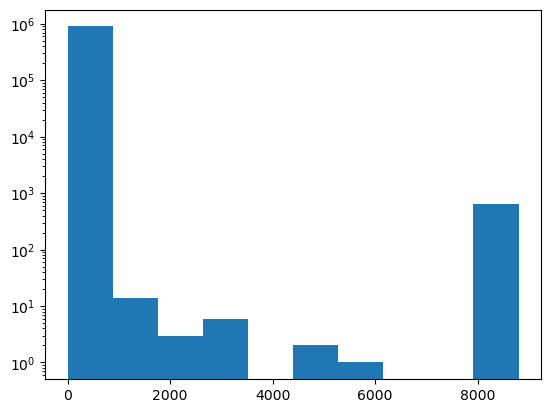

In [151]:
plt.hist(loan.CreateJob, log=True)
plt.show()

In [152]:
loan.CreateJob.dtype

dtype('int64')

### RetainedJob

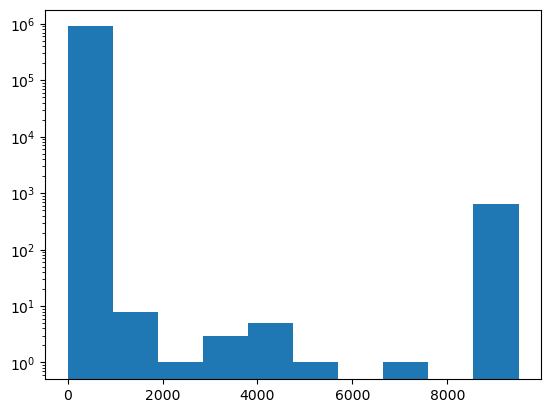

In [153]:
plt.hist(loan.RetainedJob, log=True)
plt.show()

In [154]:
loan.RetainedJob.dtype

dtype('int64')

### FranchiseCode

In [155]:
loan.FranchiseCode.value_counts()

1        638554
0        208835
78760      3373
68020      1921
50564      1034
          ...  
24421         1
61615         1
81580         1
83876         1
15930         1
Name: FranchiseCode, Length: 2768, dtype: int64

In [156]:
loan.FranchiseCode[loan.FranchiseCode.isin([0, 1])] = "no"
loan.FranchiseCode[~loan.FranchiseCode.isin([0, 1])] = "yes"

loan.FranchiseCode

C:\Users\a1056968\AppData\Local\Temp\ipykernel_10248\1876728990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.FranchiseCode[loan.FranchiseCode.isin([0, 1])] = "no"


0         yes
1         yes
2         yes
3         yes
4         yes
         ... 
899159    yes
899160    yes
899161    yes
899162    yes
899163    yes
Name: FranchiseCode, Length: 899164, dtype: object

### UrbanRural

In [157]:
loan.UrbanRural.unique()

array([0, 1, 2], dtype=int64)

In [158]:
loan.UrbanRural = loan.UrbanRural.replace({
    0: "undefined",
    1: "urban",
    2: "rural",
})

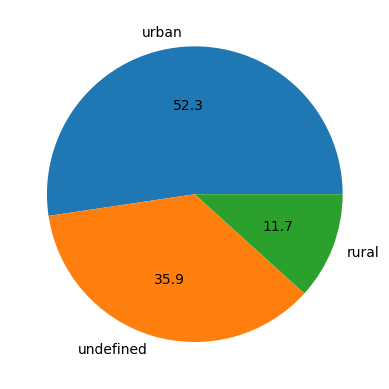

In [159]:
def plot_proportion(series):
    plt.pie(
        x=series.value_counts(),
        labels=series.value_counts().index,
        autopct="%.1f",
    )
    plt.show()

    
plot_proportion(loan.UrbanRural)

### RevLineCr

In [160]:
loan.RevLineCr.unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [161]:
loan.RevLineCr[~loan.RevLineCr.isin(['Y','N'])].count() / len(loan.RevLineCr)

0.3035608632018186

In [162]:
loan.RevLineCr.value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [163]:
loan.RevLineCr[~loan.RevLineCr.isin(['Y','N'])] = "invalid"

C:\Users\a1056968\AppData\Local\Temp\ipykernel_10248\1264592953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.RevLineCr[~loan.RevLineCr.isin(['Y','N'])] = "undefined"


In [164]:
loan.loc[:, "RevLineCr"] = loan.RevLineCr.replace({
    "Y": "yes",
    "N": "no",
})

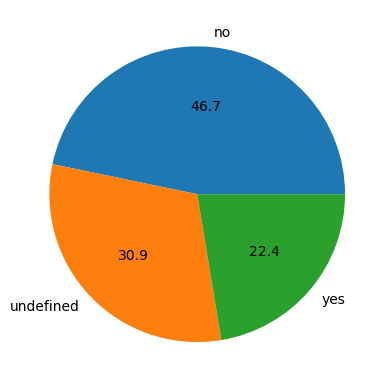

In [165]:
plot_proportion(loan.RevLineCr)

### Lowdoc

In [166]:
loan.LowDoc.value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [167]:
loan.LowDoc[~loan.LowDoc.isin(['Y','N'])] = "invalid"

C:\Users\a1056968\AppData\Local\Temp\ipykernel_10248\3150410801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.LowDoc[~loan.LowDoc.isin(['Y','N'])] = "invalid"


In [168]:
loan.LowDoc = loan.LowDoc.replace({
    "Y": "yes",
    "N": "no",
})

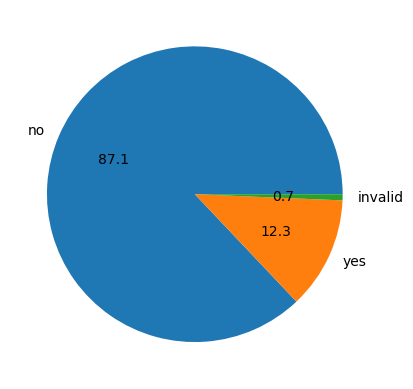

In [169]:
plot_proportion(loan.LowDoc)

### LMIS_Statuswdoc

In [177]:
loan.MIS_Status.unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [183]:
loan.MIS_Status[loan.MIS_Status.isnull()].count()

0

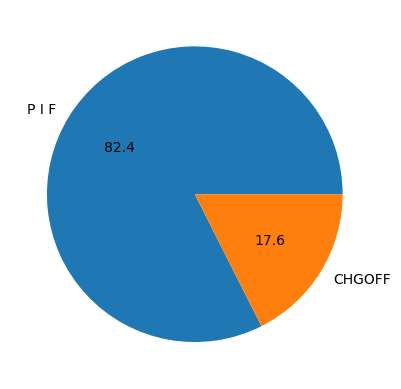

In [178]:
plot_proportion(loan.MIS_Status)